$\Large\textbf{Lab 2. Exercise 1. }$



Recall that we implemented the gradient descent algorithm to solve $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. The main ingredients in the gradient descent iterations are the descent direction $\mathbf{p}^k$ which is set to $-\nabla f(\mathbf{x}^k)$, and the step length $\eta^k$ which is found by solving an optimization problem (or sometimes taken as a constant value over all iterations). We used the following procedure in the previous lab:

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{p}^k = \mathbf{x}^k - \eta^k \nabla f (\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

We saw that for particular cases of quadratic functions, a closed form analytical solution for the minimizer of the optimization problem $\min_{\eta \geq 0} f({\mathbf{x}}^k + \eta {\mathbf{p}}^k)$ exists. However finding a closed form expression as a solution to this optimization problem to find a suitable step length might not always be possible. To tackle general situations, we will try to devise a different procedure in this lab. 

To find the step length, we will use the following property: 
Suppose a non-zero $\mathbf{p} \in {\mathbb{R}}^n$ is a descent direction at point $\mathbf{x}$, and let $\gamma \in (0,1)$. Then there exists $\varepsilon >0$ such that  
\begin{align}
f(\mathbf{x}+\alpha \mathbf{p}) \leq f(\mathbf{x}) + \gamma \alpha \nabla f(\mathbf{x})^\top \mathbf{p}, \ \forall \alpha \in (0,\varepsilon].  
\end{align}

The step length $\eta^k$ can be found using a backtracking procedure illustrated below to find appropriate value of $\varepsilon$.  




\begin{align}
& \textbf{Input:}  \text{ $\mathbf{x}^k$, $\mathbf{p}^k$, $\alpha^0$, $\rho \in (0,1)$, $\gamma \in (0,1)$ }  \\
& \textbf{Initialize } \alpha=\alpha^0 \\ 
&\textbf{While } f(\mathbf{x}^k + \alpha \mathbf{p}^k)   > f(\mathbf{x}^k) + \gamma \alpha \nabla f(\mathbf{x}^k)^\top \mathbf{p}^k \text{ do:}  \\   
&\quad \quad \alpha = \rho \alpha  \\
&\textbf{End While} \\
&\textbf{Output: } \alpha
\end{align}

In this exercise, we will check if finding the steplength using the backtracking procedure is advantageous for some quadratic functions. In this sample code we consider $f(\mathbf{x})=f(x_1,x_2) = (x_1-8)^2 + (x_2 + 12)^2$.

In [1]:
#numpy package will be used for most of our lab exercises. Please have a look at Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [2]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return (x[1]+12)**2 + (-8+x[0])**2


In [3]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([2*(x[0]-8), 2*(x[1]+12)])

In [4]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
   
  a_1 =np.linalg.multi_dot([gradf,gradf])
  a_22=np.matmul(np.transpose(gradf),A)
  a_2 =np.linalg.multi_dot([a_22,gradf])
  step_length=a_1/(2*a_2)
  
  return step_length

In [5]:
#Complete the module to compute the steplength by using the backtracking line search
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(x) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  
  alpha = alpha_start
  pk=-gradf
  while evalf(x+alpha*pk)>evalf(x)+gamma*alpha*np.linalg.multi_dot([gradf,pk]):
    alpha=rho*alpha

  #print('final step length:',alpha)
  return alpha

In [6]:
#we define the types of line search methods that we have implemented
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [7]:
def find_minimizer(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x 


**Q 3**

In [8]:

my_start_x = np.array([1,1])
my_tol= 1e-5

x_opt = find_minimizer(my_start_x, my_tol, EXACT_LINE_SEARCH)
print(x_opt)

iter: 0  x: [1 1]  f(x): 218  grad at x: [-14  26]  gradient norm: 29.5296461204668
iter: 1  x: [  8. -12.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0
[  8. -12.]


In [9]:
#check what happens when you call find_minimzer using backtracking line search
x_opt_bls = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print(x_opt_bls)

Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
iter: 0  x: [1 1]  f(x): 218  grad at x: [-14  26]  gradient norm: 29.5296461204668
iter: 1  x: [  8. -12.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0
[  8. -12.]


Hence, minimizer is (8,-12) and minimum obj function value is 0.

**Q 4**

In [10]:
start_x_4=np.array([25,25])
tol_4=1e-12

find_minimizer(start_x_4, tol_4, EXACT_LINE_SEARCH)

iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
iter: 1  x: [  8. -12.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0


array([  8., -12.])

In [11]:
find_minimizer(start_x_4, tol_4, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)

Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
iter: 1  x: [  8. -12.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0


array([  8., -12.])

Both methods are taking same(=1) number of iteration.

**Q 5**

In [12]:
#it also gives final minimum value of function and the no of iterations to obtain the result
def find_minimizer_modified(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x , evalf(x), k


In [13]:
start_x_5=np.array([25,25])
tol_5=1e-10
gamma=0.5
rho=0.5
alpha=[1,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]

In [14]:
#following dictionaries will be used to store minimizer values, final objective values and no of iterations taken
minimizer_values={}
fun_obj_values={}
no_of_iters={}

for i in alpha:
  minimizer_values[i],fun_obj_values[i],no_of_iters[i]=find_minimizer_modified(start_x_5,tol_5,BACKTRACKING_LINE_SEARCH,i,rho,gamma)

In [15]:
print(minimizer_values)

{1: array([  8., -12.]), 0.9: array([  8., -12.]), 0.75: array([  8., -12.]), 0.6: array([  8., -12.]), 0.5: array([  8., -12.]), 0.4: array([  8., -12.]), 0.25: array([  8., -12.]), 0.1: array([  8., -12.]), 0.01: array([  8., -12.])}


In [16]:
print(fun_obj_values)

{1: 0.0, 0.9: 1.6579714975258972e-21, 0.75: 1.3714654556129199e-21, 0.6: 2.2038291998576117e-21, 0.5: 0.0, 0.4: 1.1393259623274523e-22, 0.25: 1.3714654556129199e-21, 0.1: 2.3972320602008796e-21, 0.01: 2.4523367712209537e-21}


In [17]:
print(no_of_iters)

{1: 1, 0.9: 12, 0.75: 20, 0.6: 30, 0.5: 1, 0.4: 18, 0.25: 40, 0.1: 123, 0.01: 1358}


In [18]:
import matplotlib.pyplot as plt

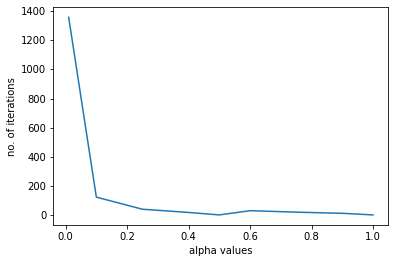

In [19]:
iters=[no_of_iters[i] for i in alpha] #list which contains no of iterations and it will be used to plot the required curve

plt.plot(alpha, iters)
# naming the x axis
plt.xlabel('alpha values')
# naming the y axis
plt.ylabel('no. of iterations')
plt.show()

In [20]:
print('number of iterations taken with exact line search: ',find_minimizer_modified(start_x_5, tol_5, EXACT_LINE_SEARCH)[2])

number of iterations taken with exact line search:  1


For very small alpha(<0.1) the number of iterations is large whereas for alpha between 0.2 and 1 there is not very large difference.

For alpha = 1 and 0.5 both methods are taking same number of iterations and for others Backtracking is taking more number of iterations as compared to Exact line search.

**Q 6**

In [21]:
start_x_6=np.array([25,25])
tol_6=1e-10
gamma=0.5
alpha=1
rho_list=[0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]

In [22]:
#following dictionaries will be used to store minimizer values, final objective values and no of iterations taken
minimizer_values_6={}
fun_obj_values_6={}
no_of_iters_6={}

for i in rho_list:
  minimizer_values_6[i],fun_obj_values_6[i],no_of_iters_6[i]=find_minimizer_modified(start_x_6,tol_6,BACKTRACKING_LINE_SEARCH,alpha,i,gamma)

In [23]:
print(minimizer_values_6)

{0.9: array([  8., -12.]), 0.75: array([  8., -12.]), 0.6: array([  8., -12.]), 0.5: array([  8., -12.]), 0.4: array([  8., -12.]), 0.25: array([  8., -12.]), 0.1: array([  8., -12.]), 0.01: array([  8., -12.])}


In [24]:
print(fun_obj_values_6)

{0.9: 4.960536411900771e-22, 0.75: 1.0819468296335504e-21, 0.6: 7.844395544174143e-22, 0.5: 0.0, 0.4: 1.1393259623274523e-22, 0.25: 1.3714654556129199e-21, 0.1: 2.3972320602008796e-21, 0.01: 2.4523367712209537e-21}


In [25]:
print(no_of_iters_6)

{0.9: 9, 0.75: 15, 0.6: 22, 0.5: 1, 0.4: 18, 0.25: 40, 0.1: 123, 0.01: 1358}


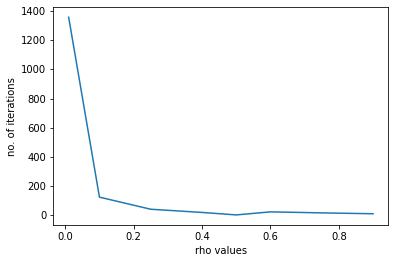

In [26]:
iters_6=[no_of_iters_6[i] for i in rho_list] #list which contains no of iterations and it will be used to plot the required curve

plt.plot(rho_list, iters_6)
# naming the x axis
plt.xlabel('rho values')
# naming the y axis
plt.ylabel('no. of iterations')
plt.show()

In [27]:
print('number of iterations taken with exact line search: ',find_minimizer_modified(start_x_6, tol_6, EXACT_LINE_SEARCH)[2])

number of iterations taken with exact line search:  1


For smaller rho the number of iterations is large whereas for rho between 0.2 and 0.9 there is no significant difference.

For rho = 0.5 both methods are taking same number of iterations and for others Backtracking is taking more number of iterations as compared to Exact line search.